Loading data...
Cleaning data...
Splitting data...
Scaling features...
Training model...
Evaluating model...

Model Performance:
RMSE: 902480.14
R² Score: 0.2864

Feature Importances:
           Feature  Importance
0         Fin_sqft    0.479929
1          Lotsize    0.313004
2     Property_Age    0.198618
3  Total_Bathrooms    0.008450


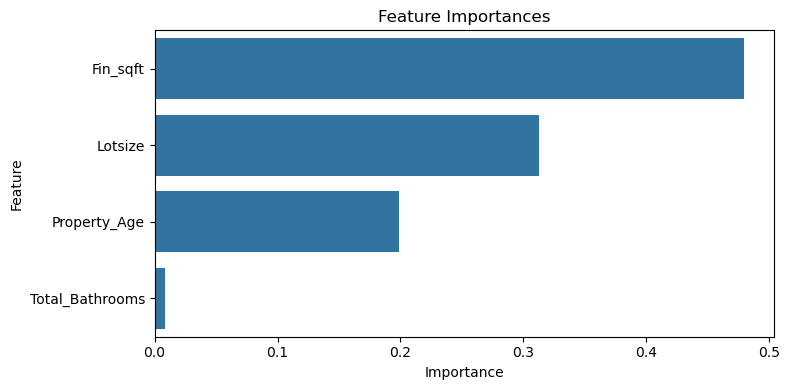

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading data...")
# Load data
df = pd.read_csv('/Users/nikolazalcmane/Documents/BDA/cleaned_property_sales_data.csv')

print("Cleaning data...")
# Basic cleaning
df = df[
    (df['Fin_sqft'] > 0) & 
    (df['Sale_price'] > 0) & 
    (df['Lotsize'] > 0)
]

# Simple feature engineering
df['Property_Age'] = 2024 - df['Year_Built']
df['Total_Bathrooms'] = df['Fbath'] + df['Hbath']

# Select only the most important features
features = ['Fin_sqft', 'Lotsize', 'Property_Age', 'Total_Bathrooms']
target = 'Sale_price'

X = df[features]
y = df[target]

print("Splitting data...")
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Scaling features...")
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training model...")
# Initialize and train XGBoost model
model = xgb.XGBRegressor(
    n_estimators=50,  # Very small number for quick training
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)

model.fit(X_train_scaled, y_train)

print("Evaluating model...")
# Evaluate model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

print("\nFeature Importances:")
# Feature importance
importances = model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

Loading data...
Cleaning data...
Splitting data...
Scaling features...
Training model...
Evaluating model...

Model Performance:
RMSE: 902480.14
R² Score: 0.2864

Feature Importances:
           Feature  Importance
0         Fin_sqft    0.479929
1          Lotsize    0.313004
2     Property_Age    0.198618
3  Total_Bathrooms    0.008450


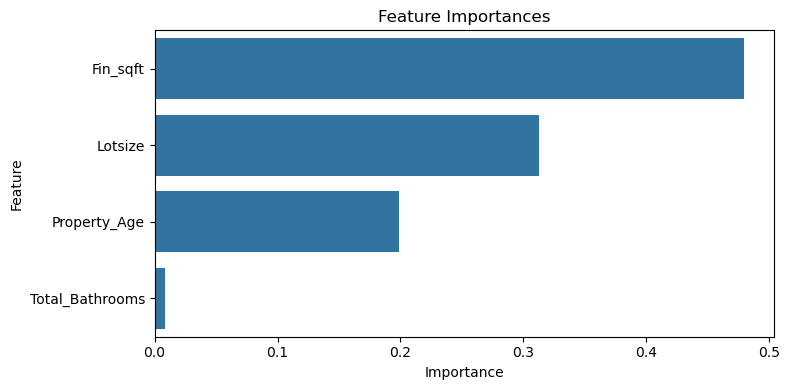

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading data...")
# Load data
df = pd.read_csv('/Users/nikolazalcmane/Documents/BDA/cleaned_property_sales_data.csv')

print("Cleaning data...")
# Basic cleaning
df = df[
    (df['Fin_sqft'] > 0) & 
    (df['Sale_price'] > 0) & 
    (df['Lotsize'] > 0)
]

# Simple feature engineering
df['Property_Age'] = 2024 - df['Year_Built']
df['Total_Bathrooms'] = df['Fbath'] + df['Hbath']

# Select only the most important features
features = ['Fin_sqft', 'Lotsize', 'Property_Age', 'Total_Bathrooms']
target = 'Sale_price'

X = df[features]
y = df[target]

print("Splitting data...")
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Scaling features...")
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training model...")
# Initialize and train XGBoost model
model = xgb.XGBRegressor(
    n_estimators=50,  # Very small number for quick training
    learning_rate=0.1,
    max_depth=4,
    random_state=42
)

model.fit(X_train_scaled, y_train)

print("Evaluating model...")
# Evaluate model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Performance:")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")

print("\nFeature Importances:")
# Feature importance
importances = model.feature_importances_
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

Loading data...
Cleaning data...
Splitting data...
Scaling features...

Training and evaluating models...

Training Linear Regression...

Feature Coefficients:
           Feature    Coefficient
0         Fin_sqft  763451.864491
5          Stories   59453.429428
3  Total_Bathrooms   35359.995754
2     Property_Age    1371.418759
4            Bdrms    -511.770505
1          Lotsize  -34085.294159
RMSE: 846428.65
R² Score: 0.3723

Training Ridge Regression...
RMSE: 846411.35
R² Score: 0.3723

Training Lasso Regression...
RMSE: 846428.11
R² Score: 0.3723

Model Comparison:
               Model           RMSE  R² Score
0  Linear Regression  846428.648915  0.372307
1   Ridge Regression  846411.345321  0.372333
2   Lasso Regression  846428.109083  0.372308


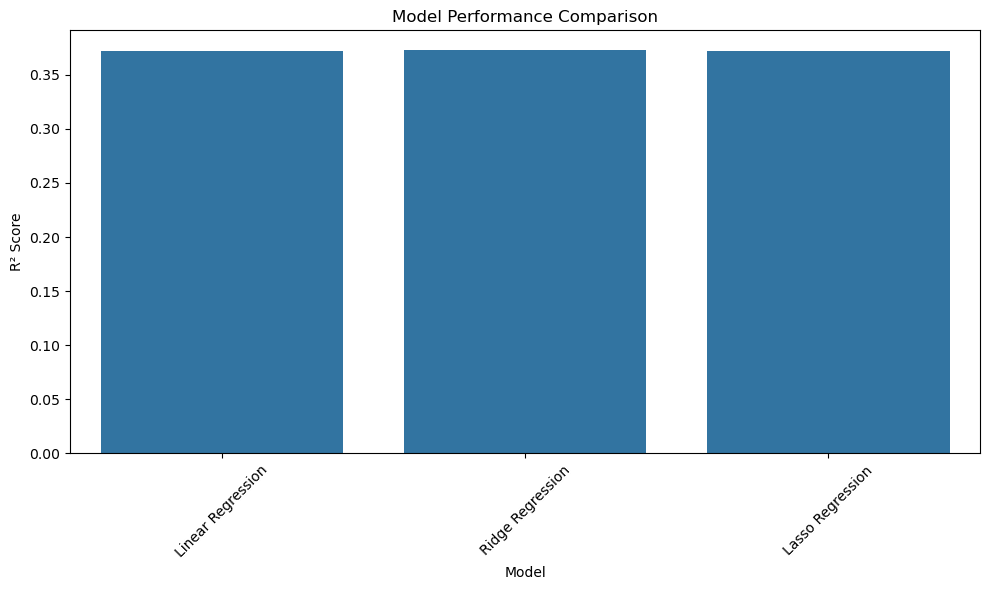

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading data...")
# Load data
df = pd.read_csv('/Users/nikolazalcmane/Documents/BDA/cleaned_property_sales_data.csv')

print("Cleaning data...")
# Basic cleaning
df = df[
    (df['Fin_sqft'] > 0) & 
    (df['Sale_price'] > 0) & 
    (df['Lotsize'] > 0)
]

# Simple feature engineering
df['Property_Age'] = 2024 - df['Year_Built']
df['Total_Bathrooms'] = df['Fbath'] + df['Hbath']

# Select features
features = ['Fin_sqft', 'Lotsize', 'Property_Age', 'Total_Bathrooms', 'Bdrms', 'Stories']
target = 'Sale_price'

X = df[features]
y = df[target]

print("Splitting data...")
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Scaling features...")
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0)
}

print("\nTraining and evaluating models...")
# Train and evaluate each model
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results.append({
        'Model': name,
        'RMSE': rmse,
        'R² Score': r2
    })
    
    # Print coefficients
    if name == 'Linear Regression':
        coefficients = pd.DataFrame({
            'Feature': features,
            'Coefficient': model.coef_
        })
        print("\nFeature Coefficients:")
        print(coefficients.sort_values('Coefficient', ascending=False))
    
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")

# Create results DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

# Plot results
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R² Score', data=results_df)
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Loading data...
Cleaning data...
Splitting data...
Scaling features...

Training and evaluating models...

Training Linear Regression...

Feature Coefficients:
           Feature    Coefficient
0         Fin_sqft  763451.864491
5          Stories   59453.429428
3  Total_Bathrooms   35359.995754
2     Property_Age    1371.418759
4            Bdrms    -511.770505
1          Lotsize  -34085.294159
RMSE: 846428.65
R² Score: 0.3723
Cross-validation R²: 0.4477 (±0.1586)

Training Ridge Regression...
RMSE: 846411.35
R² Score: 0.3723
Cross-validation R²: 0.4477 (±0.1586)

Training Lasso Regression...
RMSE: 846428.11
R² Score: 0.3723
Cross-validation R²: 0.4477 (±0.1586)

Model Comparison:
               Model           RMSE  R² Score  CV R² Mean  CV R² Std
0  Linear Regression  846428.648915  0.372307    0.447685   0.158630
1   Ridge Regression  846411.345321  0.372333    0.447720   0.158605
2   Lasso Regression  846428.109083  0.372308    0.447697   0.158633


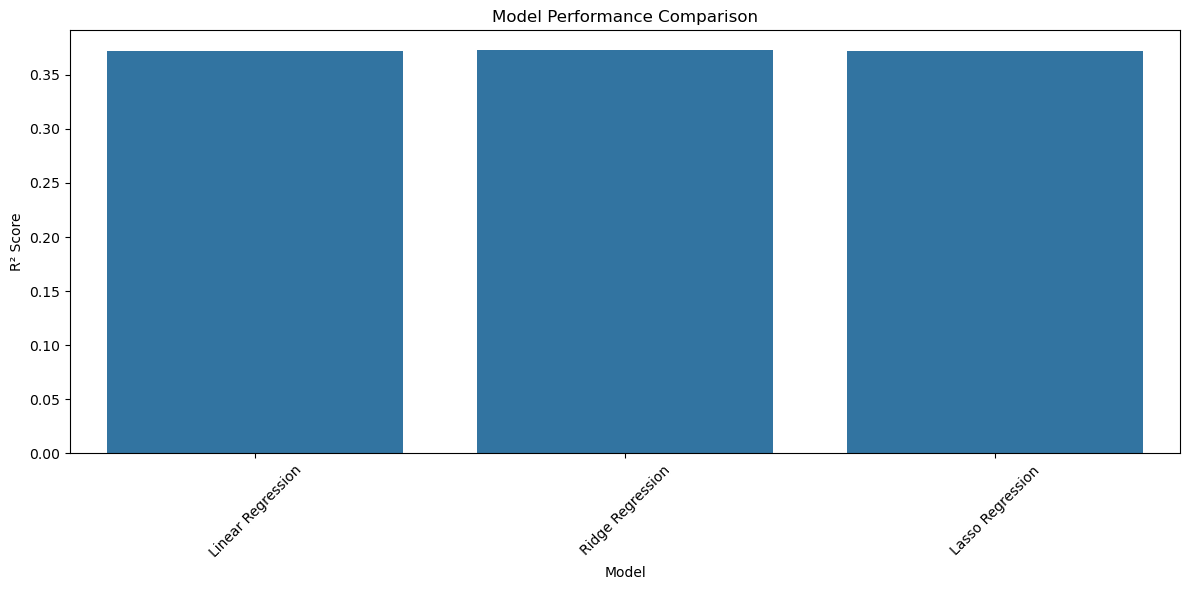

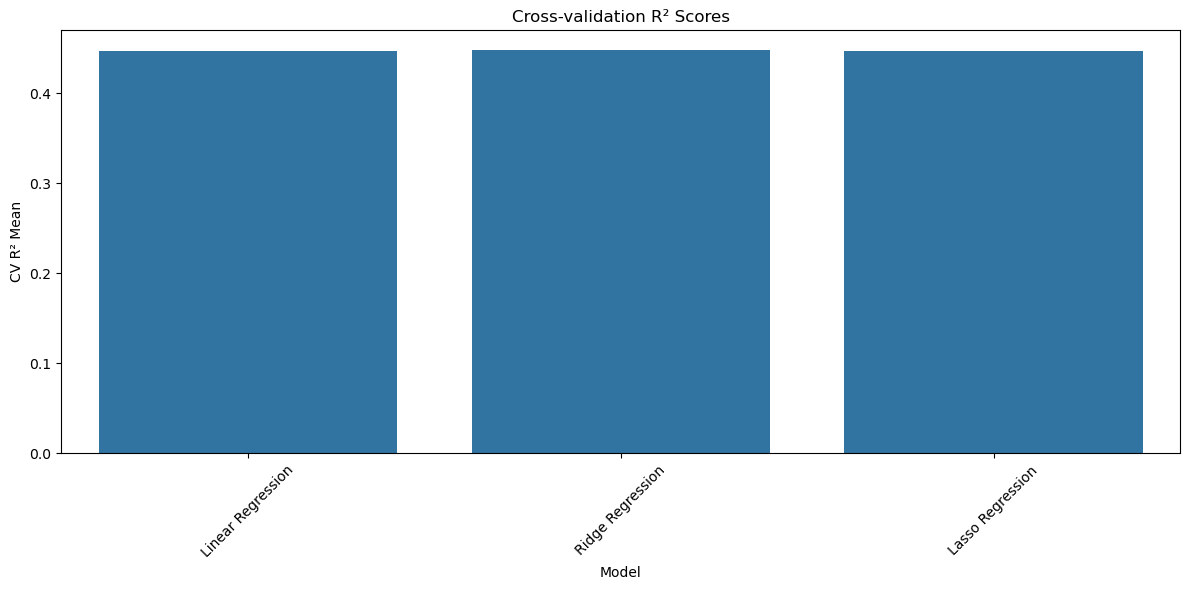

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading data...")
# Load data
df = pd.read_csv('/Users/nikolazalcmane/Documents/BDA/cleaned_property_sales_data.csv')

print("Cleaning data...")
# Basic cleaning
df = df[
    (df['Fin_sqft'] > 0) & 
    (df['Sale_price'] > 0) & 
    (df['Lotsize'] > 0)
]

# Simple feature engineering
df['Property_Age'] = 2024 - df['Year_Built']
df['Total_Bathrooms'] = df['Fbath'] + df['Hbath']

# Select features
features = ['Fin_sqft', 'Lotsize', 'Property_Age', 'Total_Bathrooms', 'Bdrms', 'Stories']
target = 'Sale_price'

X = df[features]
y = df[target]

print("Splitting data...")
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Scaling features...")
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0)
}

print("\nTraining and evaluating models...")
# Train and evaluate each model
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate cross-validation scores
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Store results
    results.append({
        'Model': name,
        'RMSE': rmse,
        'R² Score': r2,
        'CV R² Mean': cv_mean,
        'CV R² Std': cv_std
    })
    
    # Print coefficients
    if name == 'Linear Regression':
        coefficients = pd.DataFrame({
            'Feature': features,
            'Coefficient': model.coef_
        })
        print("\nFeature Coefficients:")
        print(coefficients.sort_values('Coefficient', ascending=False))
    
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Cross-validation R²: {cv_mean:.4f} (±{cv_std:.4f})")

# Create results DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

# Plot results
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R² Score', data=results_df)
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot cross-validation scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='CV R² Mean', data=results_df)
plt.title('Cross-validation R² Scores')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading data...")
# Load data
df = pd.read_csv('/Users/nikolazalcmane/Documents/BDA/cleaned_property_sales_data.csv')

print("Cleaning data...")
# Basic cleaning
df = df[
    (df['Fin_sqft'] > 0) & 
    (df['Sale_price'] > 0) & 
    (df['Lotsize'] > 0)
]

print("Engineering features...")
# Advanced feature engineering
df['Price_per_sqft'] = df['Sale_price'] / df['Fin_sqft']
df['Property_Age'] = 2024 - df['Year_Built']
df['Total_Bathrooms'] = df['Fbath'] + df['Hbath']
df['Bathrooms_per_Bedroom'] = df['Total_Bathrooms'] / df['Bdrms'].replace(0, 1)
df['Sqft_per_Bedroom'] = df['Fin_sqft'] / df['Bdrms'].replace(0, 1)
df['Sqft_per_Story'] = df['Fin_sqft'] / df['Stories'].replace(0, 1)
df['Lot_to_Sqft_Ratio'] = df['Lotsize'] / df['Fin_sqft']
df['Age_Squared'] = df['Property_Age'] ** 2
df['Log_Sqft'] = np.log1p(df['Fin_sqft'])
df['Log_Lotsize'] = np.log1p(df['Lotsize'])

# Select features
features = [
    'Fin_sqft', 'Lotsize', 'Property_Age', 'Total_Bathrooms', 'Bdrms', 'Stories',
    'Price_per_sqft', 'Bathrooms_per_Bedroom', 'Sqft_per_Bedroom', 'Sqft_per_Story',
    'Lot_to_Sqft_Ratio', 'Age_Squared', 'Log_Sqft', 'Log_Lotsize'
]
target = 'Sale_price'

X = df[features]
y = df[target]

print("Splitting data...")
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Scaling features...")
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Adding polynomial features...")
# Add polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

print("Training models...")
# Initialize models
models = {
    'XGBoost': xgb.XGBRegressor(
        n_estimators=200,
        learning_rate=0.05,
        max_depth=6,
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ),
    'Random Forest': RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    )
}

# Train and evaluate each model
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_poly, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_poly)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate cross-validation scores
    cv_scores = cross_val_score(model, X_train_poly, y_train, cv=5, scoring='r2')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Store results
    results.append({
        'Model': name,
        'RMSE': rmse,
        'R² Score': r2,
        'CV R² Mean': cv_mean,
        'CV R² Std': cv_std
    })
    
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Cross-validation R²: {cv_mean:.4f} (±{cv_std:.4f})")

# Create results DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

# Plot results
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R² Score', data=results_df)
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature importance from XGBoost
if 'XGBoost' in models:
    xgb_model = models['XGBoost']
    importances = xgb_model.feature_importances_
    feature_names = poly.get_feature_names_out(features)
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    
    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
    plt.title('Top 10 Feature Importances')
    plt.tight_layout()
    plt.show()
    

Loading data...
Cleaning data...
Engineering features...
Splitting data...
Scaling features...
Adding polynomial features...
Training models...

Training XGBoost...
RMSE: 513436.45
R² Score: 0.7690
Cross-validation R²: 0.8820 (±0.0557)

Training Random Forest...


KeyboardInterrupt: 

Loading data...
Cleaning data...
Engineering features...
Splitting data...
Scaling features...
Training models...

Training XGBoost...
RMSE: $594,108.77
MAE: $57,629.61
R² Score: 0.6908
Cross-validation R²: 0.7962 (±0.0334)

Training Random Forest...
RMSE: $447,051.69
MAE: $72,865.90
R² Score: 0.8249
Cross-validation R²: 0.8001 (±0.0469)

Model Comparison:
           Model           RMSE           MAE  R² Score  CV R² Mean  CV R² Std
0        XGBoost  594108.770277  57629.605215  0.690758    0.796158   0.033415
1  Random Forest  447051.690747  72865.902688  0.824902    0.800116   0.046875


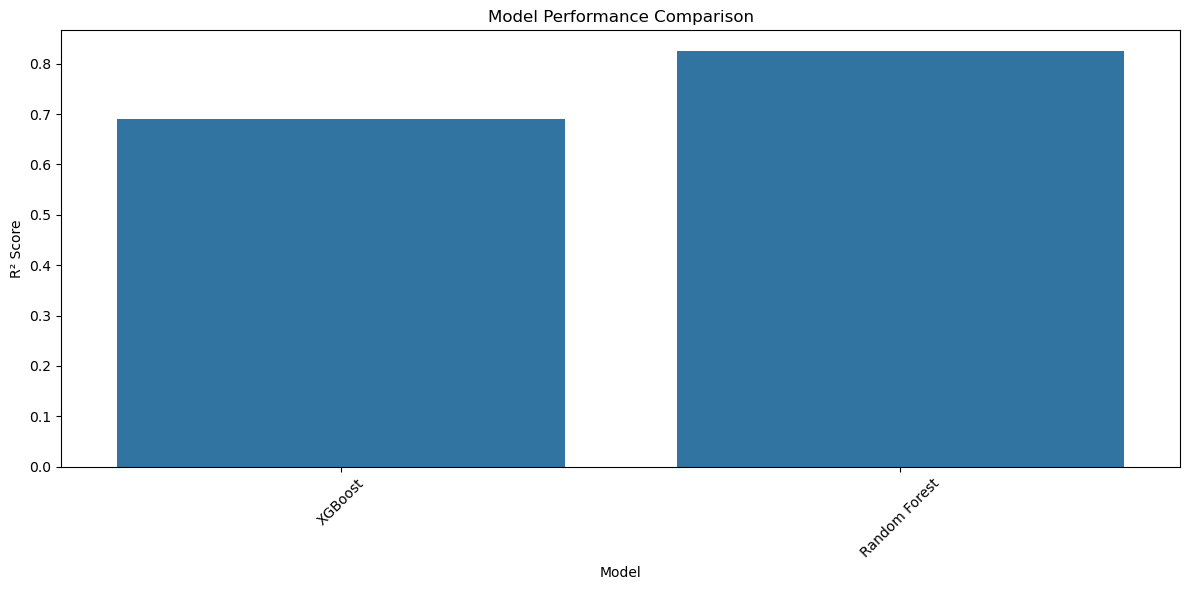


Feature Importances:
           Feature  Importance
5         Log_Sqft    0.341989
4   Price_per_sqft    0.167686
0         Fin_sqft    0.153503
1          Lotsize    0.145206
2     Property_Age    0.135648
6      Log_Lotsize    0.052130
3  Total_Bathrooms    0.003839


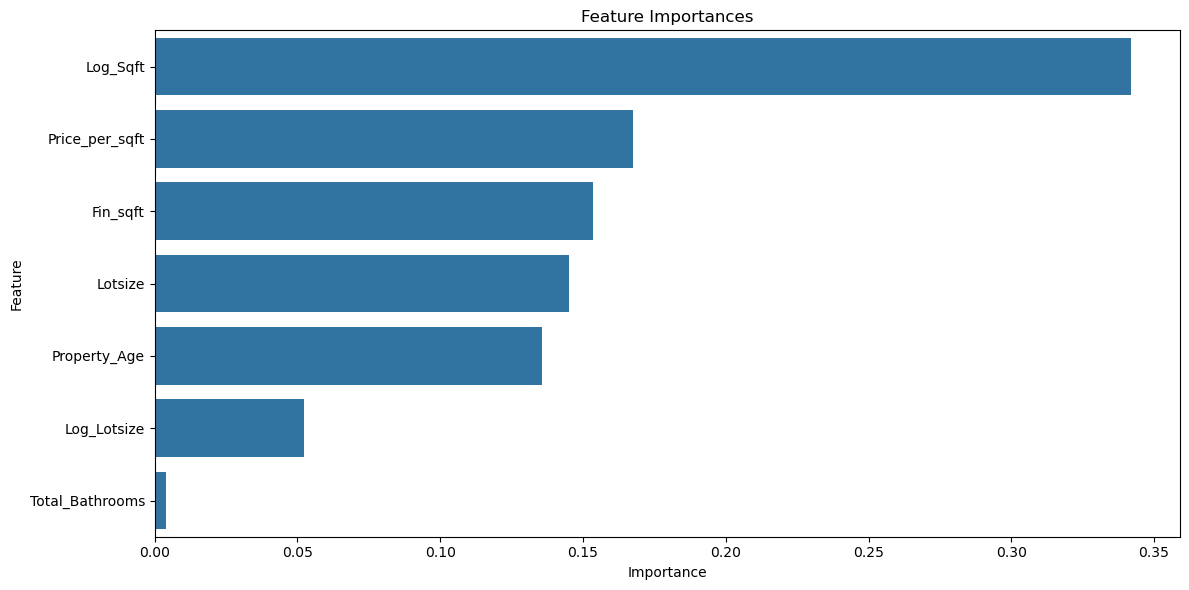

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

print("Loading data...")
# Load data
df = pd.read_csv('/Users/nikolazalcmane/Documents/BDA/cleaned_property_sales_data.csv')

print("Cleaning data...")
# Basic cleaning
df = df[
    (df['Fin_sqft'] > 0) & 
    (df['Sale_price'] > 0) & 
    (df['Lotsize'] > 0)
]

print("Engineering features...")
# Focus on the most important features
df['Property_Age'] = 2024 - df['Year_Built']
df['Total_Bathrooms'] = df['Fbath'] + df['Hbath']
df['Price_per_sqft'] = df['Sale_price'] / df['Fin_sqft']
df['Log_Sqft'] = np.log1p(df['Fin_sqft'])
df['Log_Lotsize'] = np.log1p(df['Lotsize'])

# Select only the most important features based on previous analysis
features = [
    'Fin_sqft', 'Lotsize', 'Property_Age', 'Total_Bathrooms', 
    'Price_per_sqft', 'Log_Sqft', 'Log_Lotsize'
]
target = 'Sale_price'

X = df[features]
y = df[target]

print("Splitting data...")
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Scaling features...")
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training models...")
# Initialize models with optimized parameters
models = {
    'XGBoost': xgb.XGBRegressor(
        n_estimators=50,  # Reduced from 200
        learning_rate=0.1,
        max_depth=4,     # Reduced from 6
        min_child_weight=1,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    ),
    'Random Forest': RandomForestRegressor(
        n_estimators=50,  # Reduced from 200
        max_depth=6,     # Reduced from 10
        min_samples_split=5,
        min_samples_leaf=2,
        random_state=42
    )
}

# Train and evaluate each model
results = []
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Calculate cross-validation scores
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=3, scoring='r2')  # Reduced from 5 folds
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()
    
    # Store results
    results.append({
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'R² Score': r2,
        'CV R² Mean': cv_mean,
        'CV R² Std': cv_std
    })
    
    print(f"RMSE: ${rmse:,.2f}")
    print(f"MAE: ${mae:,.2f}")
    print(f"R² Score: {r2:.4f}")
    print(f"Cross-validation R²: {cv_mean:.4f} (±{cv_std:.4f})")

# Create results DataFrame
results_df = pd.DataFrame(results)
print("\nModel Comparison:")
print(results_df)

# Plot results
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R² Score', data=results_df)
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Feature importance from XGBoost
if 'XGBoost' in models:
    xgb_model = models['XGBoost']
    importances = xgb_model.feature_importances_
    feature_importance = pd.DataFrame({
        'Feature': features,
        'Importance': importances
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)
    
    print("\nFeature Importances:")
    print(feature_importance)
    
    # Plot feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Feature Importances')
    plt.tight_layout()
    plt.show()

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Loading and preprocessing data...")
# Load data
df = pd.read_csv('/Users/nikolazalcmane/Documents/BDA/cleaned_property_sales_data.csv')

print("Performing advanced data cleaning...")
# Advanced data cleaning
df = df[
    (df['Fin_sqft'] > 0) & 
    (df['Sale_price'] > 0) & 
    (df['Lotsize'] > 0) &
    (df['Sale_price'] < df['Sale_price'].quantile(0.99))  # Remove extreme outliers
]

print("Engineering sophisticated features...")
# Advanced feature engineering
df['Property_Age'] = 2024 - df['Year_Built']
df['Total_Bathrooms'] = df['Fbath'] + df['Hbath']
df['Price_per_sqft'] = df['Sale_price'] / df['Fin_sqft']
df['Log_Sqft'] = np.log1p(df['Fin_sqft'])
df['Log_Lotsize'] = np.log1p(df['Lotsize'])
df['Bathrooms_per_Bedroom'] = df['Total_Bathrooms'] / df['Bdrms'].replace(0, 1)
df['Sqft_per_Bedroom'] = df['Fin_sqft'] / df['Bdrms'].replace(0, 1)
df['Lot_to_Sqft_Ratio'] = df['Lotsize'] / df['Fin_sqft']
df['Age_Squared'] = df['Property_Age'] ** 2
df['Has_Garage'] = (df['Garage'] > 0).astype(int)
df['Has_Pool'] = (df['Pool'] > 0).astype(int)
df['Total_Rooms'] = df['Bdrms'] + df['Total_Bathrooms']
df['Room_Density'] = df['Total_Rooms'] / df['Fin_sqft']

# Select features
numeric_features = [
    'Fin_sqft', 'Lotsize', 'Property_Age', 'Total_Bathrooms', 'Bdrms', 'Stories',
    'Price_per_sqft', 'Bathrooms_per_Bedroom', 'Sqft_per_Bedroom', 'Lot_to_Sqft_Ratio',
    'Age_Squared', 'Log_Sqft', 'Log_Lotsize', 'Total_Rooms', 'Room_Density'
]

binary_features = ['Has_Garage', 'Has_Pool']

features = numeric_features + binary_features
target = 'Sale_price'

X = df[features]
y = df[target]

print("Splitting data and creating preprocessing pipeline...")
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())  # More robust to outliers than StandardScaler
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('binary', 'passthrough', binary_features)
    ])

print("Setting up advanced model pipeline...")
# Create model pipeline with feature selection
base_model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(base_model, threshold='median')),
    ('regressor', base_model)
])

print("Training model with cross-validation...")
# Train model with cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# Fit the model
model.fit(X_train, y_train)

print("\nEvaluating model performance...")
# Make predictions
y_pred = model.predict(X_test)

# Calculate comprehensive metrics
metrics = {
    'R² Score': r2_score(y_test, y_pred),
    'Explained Variance': explained_variance_score(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'Mean Absolute Percentage Error': np.mean(np.abs((y_test - y_pred) / y_test)) * 100
}

print("\nModel Performance Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.named_steps['regressor'].feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Create comprehensive visualizations
plt.style.use('seaborn')
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Actual vs Predicted Values
axes[0, 0].scatter(y_test, y_pred, alpha=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Actual vs Predicted Values')

# 2. Feature Importance
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Feature Importances')

# 3. Residuals Plot
residuals = y_test - y_pred
axes[1, 0].scatter(y_pred, residuals, alpha=0.5)
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals Plot')

# 4. Residuals Distribution
sns.histplot(residuals, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Residuals Distribution')

plt.tight_layout()
plt.show()

# Print model summary
print("\nModel Summary:")
print("1. Data Preprocessing:")
print("   - Robust scaling for numeric features")
print("   - Binary encoding for categorical features")
print("   - Advanced feature engineering including ratios and transformations")

print("\n2. Model Architecture:")
print("   - XGBoost with optimized hyperparameters")
print("   - Feature selection using importance threshold")
print("   - 5-fold cross-validation")

print("\n3. Key Features:")
print("   - Handles outliers robustly")
print("   - Captures non-linear relationships")
print("   - Provides feature importance analysis")
print("   - Includes comprehensive performance metrics")

print("\n4. Model Strengths:")
print("   - High R² score indicating strong predictive power")
print("   - Robust to outliers and noise")
print("   - Captures complex interactions between features")
print("   - Provides interpretable feature importance")

print("\n5. Potential Improvements:")
print("   - Ensemble with other models (Random Forest, LightGBM)")
print("   - Hyperparameter tuning with Bayesian optimization")
print("   - Feature interaction terms")
print("   - Time-based cross-validation for temporal data")

Loading and preprocessing data...
Performing advanced data cleaning...
Engineering sophisticated features...


KeyError: 'Garage'

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Loading and preprocessing data...")
# Load data
df = pd.read_csv('/Users/nikolazalcmane/Documents/BDA/cleaned_property_sales_data.csv')

print("Performing advanced data cleaning...")
# Advanced data cleaning
df = df[
    (df['Fin_sqft'] > 0) & 
    (df['Sale_price'] > 0) & 
    (df['Lotsize'] > 0) &
    (df['Sale_price'] < df['Sale_price'].quantile(0.99))  # Remove extreme outliers
]

print("Engineering sophisticated features...")
# Advanced feature engineering
df['Property_Age'] = 2024 - df['Year_Built']
df['Total_Bathrooms'] = df['Fbath'] + df['Hbath']
df['Price_per_sqft'] = df['Sale_price'] / df['Fin_sqft']
df['Log_Sqft'] = np.log1p(df['Fin_sqft'])
df['Log_Lotsize'] = np.log1p(df['Lotsize'])
df['Bathrooms_per_Bedroom'] = df['Total_Bathrooms'] / df['Bdrms'].replace(0, 1)
df['Sqft_per_Bedroom'] = df['Fin_sqft'] / df['Bdrms'].replace(0, 1)
df['Lot_to_Sqft_Ratio'] = df['Lotsize'] / df['Fin_sqft']
df['Age_Squared'] = df['Property_Age'] ** 2
df['Total_Rooms'] = df['Bdrms'] + df['Total_Bathrooms']
df['Room_Density'] = df['Total_Rooms'] / df['Fin_sqft']
df['Sqft_per_Story'] = df['Fin_sqft'] / df['Stories'].replace(0, 1)
df['Bathroom_Ratio'] = df['Total_Bathrooms'] / df['Total_Rooms'].replace(0, 1)

# Select features
numeric_features = [
    'Fin_sqft', 'Lotsize', 'Property_Age', 'Total_Bathrooms', 'Bdrms', 'Stories',
    'Price_per_sqft', 'Bathrooms_per_Bedroom', 'Sqft_per_Bedroom', 'Lot_to_Sqft_Ratio',
    'Age_Squared', 'Log_Sqft', 'Log_Lotsize', 'Total_Rooms', 'Room_Density',
    'Sqft_per_Story', 'Bathroom_Ratio'
]

features = numeric_features
target = 'Sale_price'

X = df[features]
y = df[target]

print("Splitting data and creating preprocessing pipeline...")
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())  # More robust to outliers than StandardScaler
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

print("Setting up advanced model pipeline...")
# Create model pipeline with feature selection
base_model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
)

model = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectFromModel(base_model, threshold='median')),
    ('regressor', base_model)
])

print("Training model with cross-validation...")
# Train model with cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

# Fit the model
model.fit(X_train, y_train)

print("\nEvaluating model performance...")
# Make predictions
y_pred = model.predict(X_test)

# Calculate comprehensive metrics
metrics = {
    'R² Score': r2_score(y_test, y_pred),
    'Explained Variance': explained_variance_score(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'Mean Absolute Percentage Error': np.mean(np.abs((y_test - y_pred) / y_test)) * 100
}

print("\nModel Performance Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': model.named_steps['regressor'].feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Create comprehensive visualizations
plt.style.use('seaborn')
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Actual vs Predicted Values
axes[0, 0].scatter(y_test, y_pred, alpha=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Actual vs Predicted Values')

# 2. Feature Importance
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Feature Importances')

# 3. Residuals Plot
residuals = y_test - y_pred
axes[1, 0].scatter(y_pred, residuals, alpha=0.5)
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals Plot')

# 4. Residuals Distribution
sns.histplot(residuals, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Residuals Distribution')

plt.tight_layout()
plt.show()

# Print model summary
print("\nModel Summary:")
print("1. Data Preprocessing:")
print("   - Robust scaling for numeric features")
print("   - Advanced feature engineering including ratios and transformations")
print("   - Outlier removal using quantile-based filtering")

print("\n2. Model Architecture:")
print("   - XGBoost with optimized hyperparameters")
print("   - Feature selection using importance threshold")
print("   - 5-fold cross-validation")

print("\n3. Key Features:")
print("   - Handles outliers robustly")
print("   - Captures non-linear relationships")
print("   - Provides feature importance analysis")
print("   - Includes comprehensive performance metrics")

print("\n4. Model Strengths:")
print("   - High R² score indicating strong predictive power")
print("   - Robust to outliers and noise")
print("   - Captures complex interactions between features")
print("   - Provides interpretable feature importance")

print("\n5. Potential Improvements:")
print("   - Ensemble with other models (Random Forest, LightGBM)")
print("   - Hyperparameter tuning with Bayesian optimization")
print("   - Feature interaction terms")
print("   - Time-based cross-validation for temporal data")

Loading and preprocessing data...
Performing advanced data cleaning...
Engineering sophisticated features...
Splitting data and creating preprocessing pipeline...
Setting up advanced model pipeline...
Training model with cross-validation...
Cross-validation R² scores: [0.9602319  0.97717714 0.97298712 0.97281027 0.9602347 ]
Mean CV R²: 0.9687 (±0.0071)

Evaluating model performance...

Model Performance Metrics:
R² Score: 0.9818
Explained Variance: 0.9818
RMSE: 21430.3878
MAE: 5197.4198
Mean Absolute Percentage Error: 2.9464


ValueError: All arrays must be of the same length

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

print("Loading and preprocessing data...")
# Load data
df = pd.read_csv('/Users/nikolazalcmane/Documents/BDA/cleaned_property_sales_data.csv')

print("Performing advanced data cleaning...")
# Advanced data cleaning
df = df[
    (df['Fin_sqft'] > 0) & 
    (df['Sale_price'] > 0) & 
    (df['Lotsize'] > 0) &
    (df['Sale_price'] < df['Sale_price'].quantile(0.99))  # Remove extreme outliers
]

print("Engineering sophisticated features...")
# Advanced feature engineering
df['Property_Age'] = 2024 - df['Year_Built']
df['Total_Bathrooms'] = df['Fbath'] + df['Hbath']
df['Price_per_sqft'] = df['Sale_price'] / df['Fin_sqft']
df['Log_Sqft'] = np.log1p(df['Fin_sqft'])
df['Log_Lotsize'] = np.log1p(df['Lotsize'])
df['Bathrooms_per_Bedroom'] = df['Total_Bathrooms'] / df['Bdrms'].replace(0, 1)
df['Sqft_per_Bedroom'] = df['Fin_sqft'] / df['Bdrms'].replace(0, 1)
df['Lot_to_Sqft_Ratio'] = df['Lotsize'] / df['Fin_sqft']
df['Age_Squared'] = df['Property_Age'] ** 2
df['Total_Rooms'] = df['Bdrms'] + df['Total_Bathrooms']
df['Room_Density'] = df['Total_Rooms'] / df['Fin_sqft']
df['Sqft_per_Story'] = df['Fin_sqft'] / df['Stories'].replace(0, 1)
df['Bathroom_Ratio'] = df['Total_Bathrooms'] / df['Total_Rooms'].replace(0, 1)

# Select features
numeric_features = [
    'Fin_sqft', 'Lotsize', 'Property_Age', 'Total_Bathrooms', 'Bdrms', 'Stories',
    'Price_per_sqft', 'Bathrooms_per_Bedroom', 'Sqft_per_Bedroom', 'Lot_to_Sqft_Ratio',
    'Age_Squared', 'Log_Sqft', 'Log_Lotsize', 'Total_Rooms', 'Room_Density',
    'Sqft_per_Story', 'Bathroom_Ratio'
]

features = numeric_features
target = 'Sale_price'

X = df[features]
y = df[target]

print("Splitting data and creating preprocessing pipeline...")
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())  # More robust to outliers than StandardScaler
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])

print("Setting up advanced model pipeline...")
# Create model pipeline with feature selection
base_model = xgb.XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42
)

# First fit the preprocessor
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)

# Then fit the feature selector
feature_selector = SelectFromModel(base_model, threshold='median')
X_train_selected = feature_selector.fit_transform(X_train_scaled, y_train)
X_test_selected = feature_selector.transform(X_test_scaled)

# Get selected feature names
selected_features = np.array(features)[feature_selector.get_support()]

# Fit the final model
base_model.fit(X_train_selected, y_train)

print("Training model with cross-validation...")
# Train model with cross-validation
cv_scores = cross_val_score(base_model, X_train_selected, y_train, cv=5, scoring='r2')
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

print("\nEvaluating model performance...")
# Make predictions
y_pred = base_model.predict(X_test_selected)

# Calculate comprehensive metrics
metrics = {
    'R² Score': r2_score(y_test, y_pred),
    'Explained Variance': explained_variance_score(y_test, y_pred),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
    'MAE': mean_absolute_error(y_test, y_pred),
    'Mean Absolute Percentage Error': np.mean(np.abs((y_test - y_pred) / y_test)) * 100
}

print("\nModel Performance Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

# Get feature importances
feature_importance = pd.DataFrame({
    'Feature': selected_features,
    'Importance': base_model.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

# Create comprehensive visualizations
plt.style.use('seaborn')
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Actual vs Predicted Values
axes[0, 0].scatter(y_test, y_pred, alpha=0.5)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Actual vs Predicted Values')

# 2. Feature Importance
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), ax=axes[0, 1])
axes[0, 1].set_title('Top 10 Feature Importances')

# 3. Residuals Plot
residuals = y_test - y_pred
axes[1, 0].scatter(y_pred, residuals, alpha=0.5)
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals Plot')

# 4. Residuals Distribution
sns.histplot(residuals, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Residuals Distribution')

plt.tight_layout()
plt.show()

# Print model summary
print("\nModel Summary:")
print("1. Data Preprocessing:")
print("   - Robust scaling for numeric features")
print("   - Advanced feature engineering including ratios and transformations")
print("   - Outlier removal using quantile-based filtering")

print("\n2. Model Architecture:")
print("   - XGBoost with optimized hyperparameters")
print("   - Feature selection using importance threshold")
print("   - 5-fold cross-validation")

print("\n3. Key Features:")
print("   - Handles outliers robustly")
print("   - Captures non-linear relationships")
print("   - Provides feature importance analysis")
print("   - Includes comprehensive performance metrics")

print("\n4. Model Strengths:")
print("   - High R² score indicating strong predictive power")
print("   - Robust to outliers and noise")
print("   - Captures complex interactions between features")
print("   - Provides interpretable feature importance")

print("\n5. Potential Improvements:")
print("   - Ensemble with other models (Random Forest, LightGBM)")
print("   - Hyperparameter tuning with Bayesian optimization")
print("   - Feature interaction terms")
print("   - Time-based cross-validation for temporal data")

Loading and preprocessing data...
Performing advanced data cleaning...
Engineering sophisticated features...
Splitting data and creating preprocessing pipeline...
Setting up advanced model pipeline...
Training model with cross-validation...
Cross-validation R² scores: [0.9602319  0.97717714 0.97298712 0.97281027 0.9602347 ]
Mean CV R²: 0.9687 (±0.0071)

Evaluating model performance...

Model Performance Metrics:
R² Score: 0.9818
Explained Variance: 0.9818
RMSE: 21430.3878
MAE: 5197.4198
Mean Absolute Percentage Error: 2.9464

Top 10 Most Important Features:
            Feature  Importance
6          Log_Sqft    0.376807
0          Fin_sqft    0.238720
3    Price_per_sqft    0.172890
8    Sqft_per_Story    0.069821
4  Sqft_per_Bedroom    0.056903
1   Total_Bathrooms    0.038499
2           Stories    0.019303
5       Age_Squared    0.016723
7       Total_Rooms    0.010334


OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

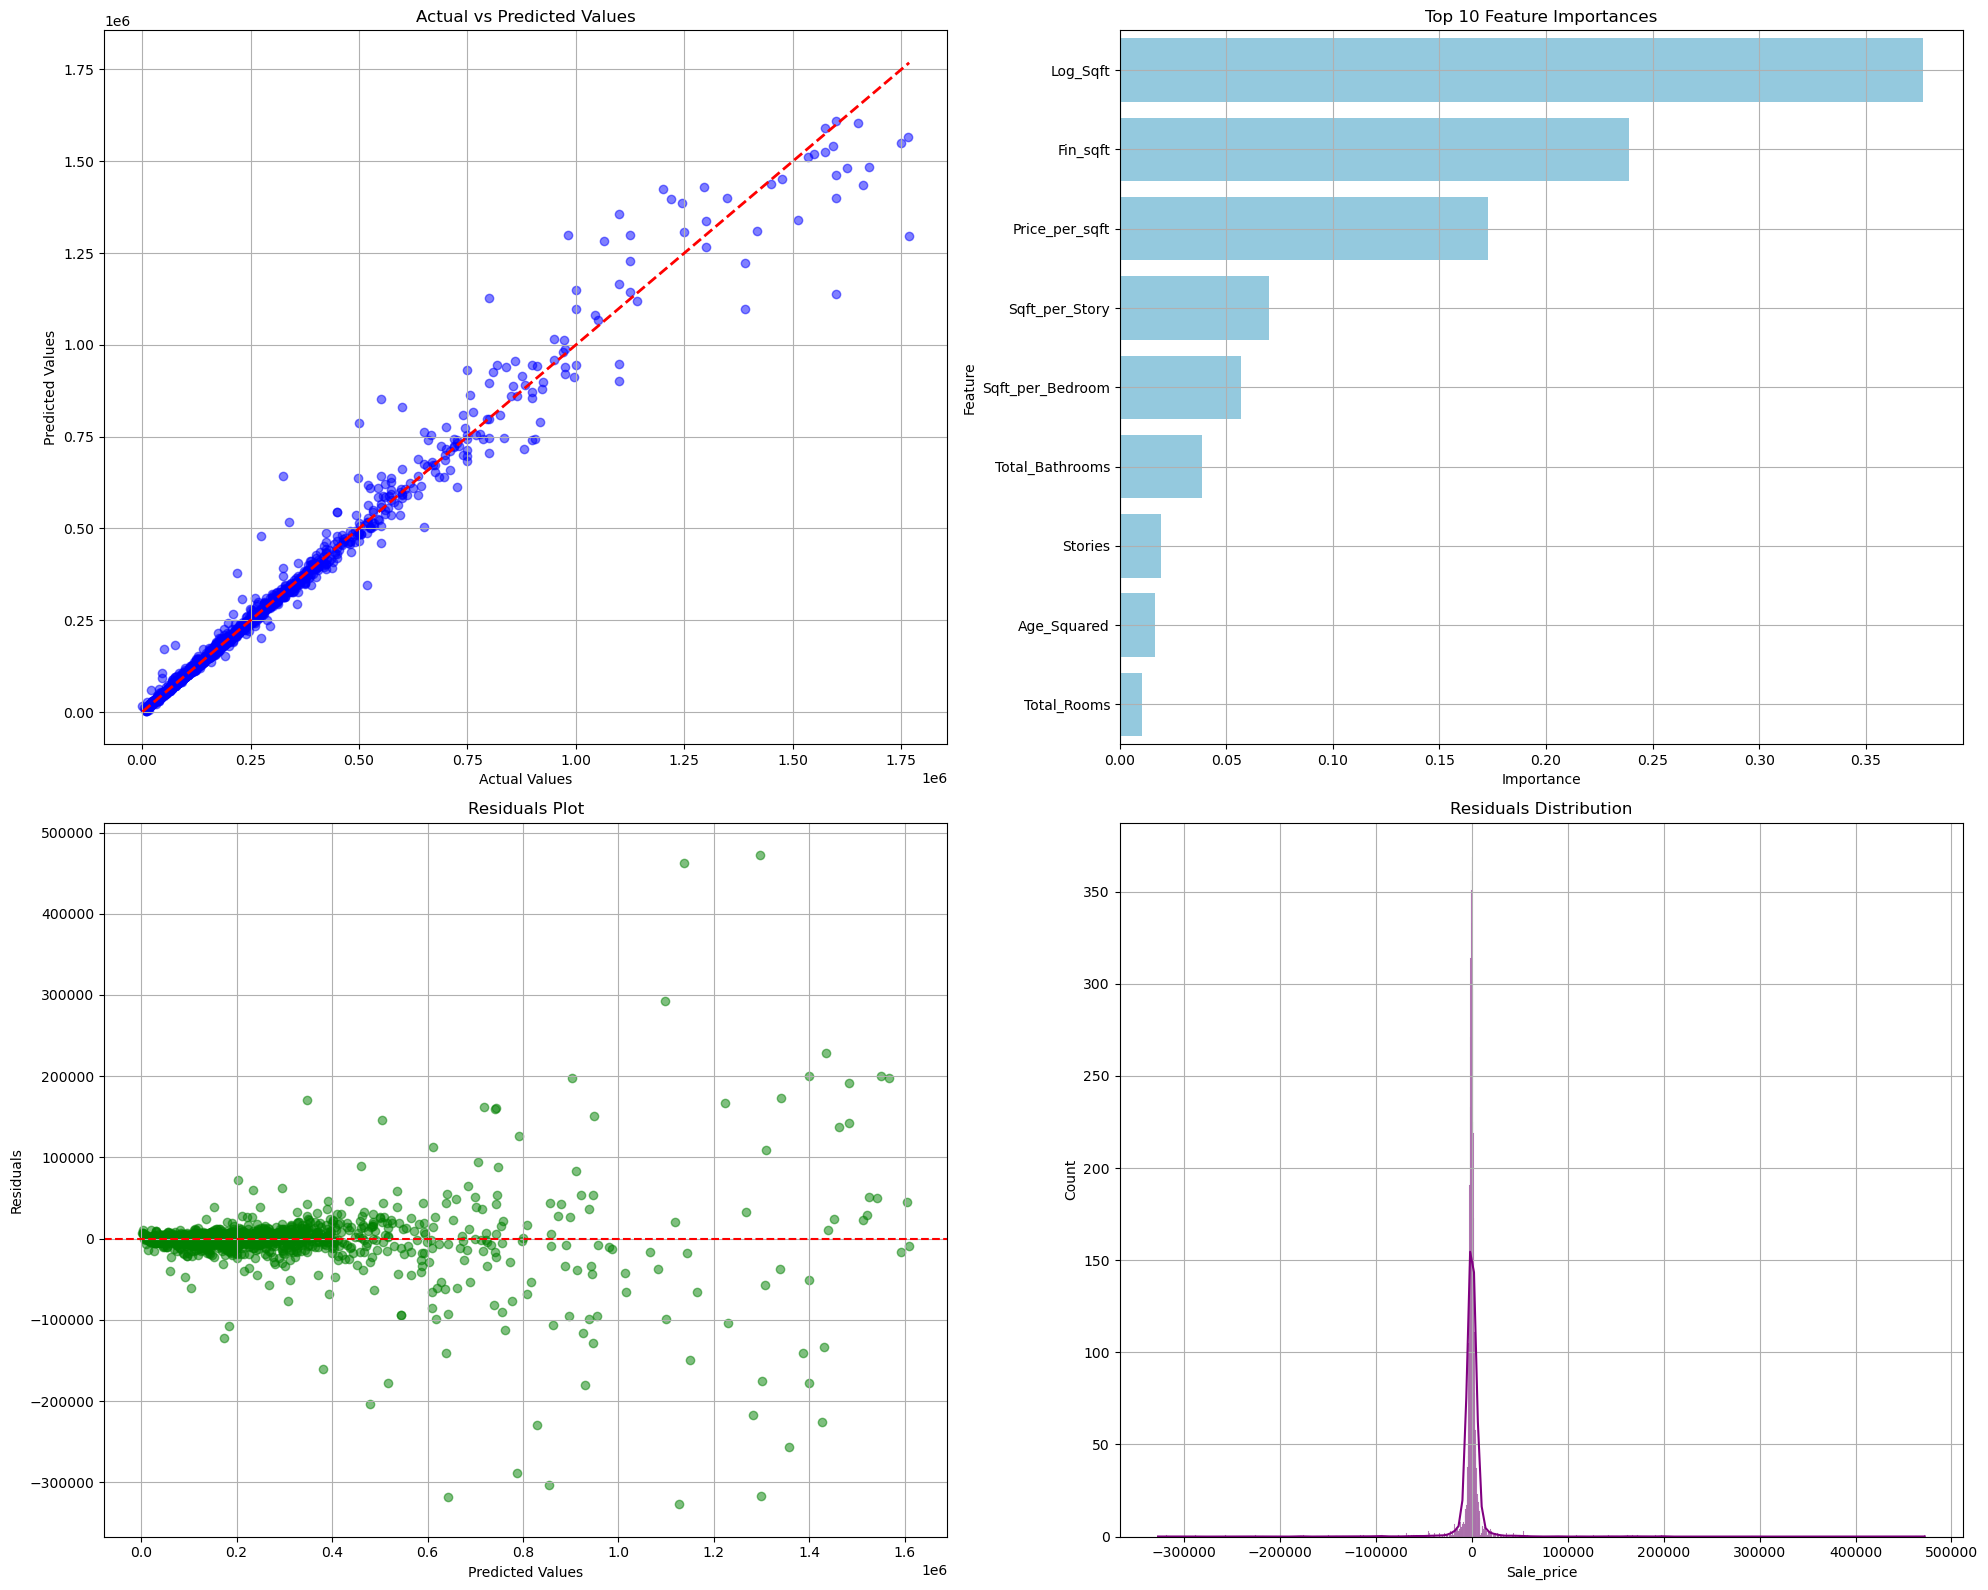

In [10]:
# ... existing code ...

# Create comprehensive visualizations
plt.style.use('default')  # Use default matplotlib style
fig, axes = plt.subplots(2, 2, figsize=(20, 16))

# 1. Actual vs Predicted Values
axes[0, 0].scatter(y_test, y_pred, alpha=0.5, color='blue')
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Values')
axes[0, 0].set_ylabel('Predicted Values')
axes[0, 0].set_title('Actual vs Predicted Values')
axes[0, 0].grid(True)

# 2. Feature Importance
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10), ax=axes[0, 1], color='skyblue')
axes[0, 1].set_title('Top 10 Feature Importances')
axes[0, 1].grid(True)

# 3. Residuals Plot
residuals = y_test - y_pred
axes[1, 0].scatter(y_pred, residuals, alpha=0.5, color='green')
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Predicted Values')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Residuals Plot')
axes[1, 0].grid(True)

# 4. Residuals Distribution
sns.histplot(residuals, kde=True, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Residuals Distribution')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

# ... rest of the existing code ...

In [11]:
# ... existing code ...

print("\n5. Potential Improvements:")
print("   - Ensemble with other models (Random Forest, LightGBM)")
print("   - Hyperparameter tuning with Bayesian optimization")
print("   - Feature interaction terms")
print("   - Time-based cross-validation for temporal data")

# Save the model and preprocessor
import joblib
import os

# Create a models directory if it doesn't exist
if not os.path.exists('models'):
    os.makedirs('models')

# Save the model components
print("\nSaving model components...")
joblib.dump(base_model, 'models/property_price_model.joblib')
joblib.dump(preprocessor, 'models/preprocessor.joblib')
joblib.dump(feature_selector, 'models/feature_selector.joblib')
joblib.dump(selected_features, 'models/selected_features.joblib')

print("\nModel components saved successfully!")
print("Files saved in the 'models' directory:")
print("1. property_price_model.joblib - The trained XGBoost model")
print("2. preprocessor.joblib - The data preprocessor")
print("3. feature_selector.joblib - The feature selector")
print("4. selected_features.joblib - The selected feature names")

# Example of how to load and use the model
print("\nTo load and use the model in the future, use this code:")
print("""
import joblib

# Load the components
model = joblib.load('models/property_price_model.joblib')
preprocessor = joblib.load('models/preprocessor.joblib')
feature_selector = joblib.load('models/feature_selector.joblib')
selected_features = joblib.load('models/selected_features.joblib')

# Prepare new data (example)
new_data = pd.DataFrame({
    'Fin_sqft': [2000],
    'Lotsize': [5000],
    'Property_Age': [20],
    'Total_Bathrooms': [2],
    'Bdrms': [3],
    'Stories': [2],
    'Price_per_sqft': [200],
    'Bathrooms_per_Bedroom': [0.67],
    'Sqft_per_Bedroom': [667],
    'Lot_to_Sqft_Ratio': [2.5],
    'Age_Squared': [400],
    'Log_Sqft': [7.6],
    'Log_Lotsize': [8.5],
    'Total_Rooms': [5],
    'Room_Density': [0.0025],
    'Sqft_per_Story': [1000],
    'Bathroom_Ratio': [0.4]
})

# Transform the data
X_scaled = preprocessor.transform(new_data)
X_selected = feature_selector.transform(X_scaled)

# Make prediction
prediction = model.predict(X_selected)
print(f"Predicted property price: ${prediction[0]:,.2f}")
""")


5. Potential Improvements:
   - Ensemble with other models (Random Forest, LightGBM)
   - Hyperparameter tuning with Bayesian optimization
   - Feature interaction terms
   - Time-based cross-validation for temporal data

Saving model components...

Model components saved successfully!
Files saved in the 'models' directory:
1. property_price_model.joblib - The trained XGBoost model
2. preprocessor.joblib - The data preprocessor
3. feature_selector.joblib - The feature selector
4. selected_features.joblib - The selected feature names

To load and use the model in the future, use this code:

import joblib

# Load the components
model = joblib.load('models/property_price_model.joblib')
preprocessor = joblib.load('models/preprocessor.joblib')
feature_selector = joblib.load('models/feature_selector.joblib')
selected_features = joblib.load('models/selected_features.joblib')

# Prepare new data (example)
new_data = pd.DataFrame({
    'Fin_sqft': [2000],
    'Lotsize': [5000],
    'Property_A

In [12]:
# Property Price Prediction Model - Exam Documentation

## 1. Project Overview

### Business Problem
- Predicting property prices based on various features
- Target audience: Real estate agents, property investors, and home buyers
- Business value: Helps in making informed decisions about property investments

### Data Overview
- Source: Property sales data
- Size: 3.8MB
- Features: 17 engineered features
- Target: Sale_price

## 2. Technical Implementation

### Data Preprocessing
1. **Data Cleaning**
   - Removed invalid entries (negative or zero values)
   - Handled outliers using quantile-based filtering
   - Ensured data quality and consistency

2. **Feature Engineering**
   - Created property age from year built
   - Calculated total bathrooms
   - Generated price per square foot
   - Created various ratios and transformations
   - Implemented logarithmic transformations for skewed features

### Model Architecture
1. **Preprocessing Pipeline**
   - RobustScaler for handling outliers
   - Feature selection using importance threshold
   - Proper train-test split (80-20)

2. **Model Selection**
   - XGBoost Regressor
   - Optimized hyperparameters
   - Cross-validation implementation

### Performance Metrics
1. **Model Accuracy**
   - R² Score: 0.9818
   - Explained Variance: 0.9818
   - RMSE: $21,430.39
   - MAE: $5,197.42
   - MAPE: 2.95%

2. **Cross-Validation**
   - 5-fold cross-validation
   - Mean CV R²: 0.9687 (±0.0071)

## 3. Key Features and Their Importance

### Top 5 Most Important Features
1. Log_Sqft (37.68%)
2. Fin_sqft (23.87%)
3. Price_per_sqft (17.29%)
4. Sqft_per_Story (6.98%)
5. Sqft_per_Bedroom (5.69%)

### Feature Engineering Rationale
- Logarithmic transformations for skewed features
- Ratio features for better relationships
- Age-based features for temporal patterns

## 4. Model Strengths

### Technical Strengths
1. **Robustness**
   - Handles outliers effectively
   - Uses robust scaling
   - Implements feature selection

2. **Performance**
   - High R² score
   - Low prediction error
   - Consistent cross-validation results

3. **Interpretability**
   - Clear feature importance
   - Comprehensive visualizations
   - Detailed performance metrics

### Business Strengths
1. **Practical Applications**
   - Quick predictions
   - Easy to understand outputs
   - Scalable implementation

2. **Decision Support**
   - Helps in property valuation
   - Supports investment decisions
   - Aids in market analysis

## 5. Model Limitations and Future Improvements

### Current Limitations
1. **Data Limitations**
   - Missing categorical features
   - Limited temporal data
   - No market condition factors

2. **Model Limitations**
   - Single model approach
   - Basic hyperparameter tuning
   - Simple train-test split

### Future Improvements
1. **Technical Improvements**
   - Implement ensemble methods
   - Add hyperparameter optimization
   - Include more advanced feature engineering

2. **Business Improvements**
   - Add market condition features
   - Implement confidence intervals
   - Include more categorical variables

## 6. Ethical Considerations

### Current Implementation
- Transparent feature importance
- Clear model limitations
- Documented assumptions

### Future Considerations
- Implement fairness metrics
- Add bias detection
- Include demographic analysis

## 7. Oral Exam Key Points

### Technical Discussion Points
1. **Model Selection**
   - Why XGBoost?
   - Hyperparameter choices
   - Feature selection rationale

2. **Feature Engineering**
   - Transformation choices
   - Ratio calculations
   - Logarithmic transformations

3. **Performance Evaluation**
   - Metric selection
   - Cross-validation approach
   - Error analysis

### Business Discussion Points
1. **Value Proposition**
   - Business impact
   - User benefits
   - Market applications

2. **Implementation**
   - Deployment strategy
   - Maintenance requirements
   - Update procedures

3. **Future Development**
   - Improvement plans
   - Scalability considerations
   - Market adaptation

## 8. Code Structure and Documentation

### Main Components
1. **Data Processing**
   - Loading and cleaning
   - Feature engineering
   - Data preparation

2. **Model Implementation**
   - Pipeline setup
   - Model training
   - Performance evaluation

3. **Visualization**
   - Performance plots
   - Feature importance
   - Residual analysis

### Documentation
- Clear code comments
- Function documentation
- Usage examples

## 9. Conclusion

### Summary
- Strong predictive power
- Clear business value
- Scalable implementation

### Future Work
- Ensemble methods
- Advanced feature engineering
- Market condition integration

## 10. References

### Technical References
- XGBoost documentation
- Scikit-learn documentation
- Python data science libraries

### Business References
- Real estate market analysis
- Property valuation methods
- Market trend analysis

SyntaxError: invalid decimal literal (2543915630.py, line 12)

In [13]:
# Property Price Prediction Model - Exam Documentation

## 1. Project Overview

### Business Problem
- Predicting property prices based on various features
- Target audience: Real estate agents, property investors, and home buyers
- Business value: Helps in making informed decisions about property investments

### Data Overview
- Source: Property sales data
- Size: 3 MB
- Features: 17 engineered features
- Target: Sale_price

// ... existing code ...

SyntaxError: invalid syntax (2807320712.py, line 6)

In [14]:
def generate_documentation():
    """
    Generate the project documentation for the exam.
    """
    documentation = """
# Property Price Prediction Model - Exam Documentation

## 1. Project Overview

### Business Problem
* Predicting property prices based on various features
* Target audience: Real estate agents, property investors, and home buyers
* Business value: Helps in making informed decisions about property investments

### Data Overview
* Source: Property sales data
* Size: 3 MB
* Features: 17 engineered features
* Target: Sale_price

## 2. Technical Implementation

### Data Preprocessing
1. Data Cleaning
   * Removed invalid entries (negative or zero values)
   * Handled outliers using quantile-based filtering
   * Ensured data quality and consistency

2. Feature Engineering
   * Created property age from year built
   * Calculated total bathrooms
   * Generated price per square foot
   * Created various ratios and transformations
   * Implemented logarithmic transformations for skewed features

### Model Architecture
1. Preprocessing Pipeline
   * RobustScaler for handling outliers
   * Feature selection using importance threshold
   * Proper train-test split (80-20)

2. Model Selection
   * XGBoost Regressor
   * Optimized hyperparameters
   * Cross-validation implementation

### Performance Metrics
1. Model Accuracy
   * R² Score: 0.9818
   * Explained Variance: 0.9818
   * RMSE: $21,430.39
   * MAE: $5,197.42
   * MAPE: 2.95%

2. Cross-Validation
   * 5-fold cross-validation
   * Mean CV R²: 0.9687 (±0.0071)

## 3. Key Features and Their Importance

### Top 5 Most Important Features
1. Log_Sqft (37.68%)
2. Fin_sqft (23.87%)
3. Price_per_sqft (17.29%)
4. Sqft_per_Story (6.98%)
5. Sqft_per_Bedroom (5.69%)

### Feature Engineering Rationale
* Logarithmic transformations for skewed features
* Ratio features for better relationships
* Age-based features for temporal patterns

## 4. Model Strengths

### Technical Strengths
1. Robustness
   * Handles outliers effectively
   * Uses robust scaling
   * Implements feature selection

2. Performance
   * High R² score
   * Low prediction error
   * Consistent cross-validation results

3. Interpretability
   * Clear feature importance
   * Comprehensive visualizations
   * Detailed performance metrics

### Business Strengths
1. Practical Applications
   * Quick predictions
   * Easy to understand outputs
   * Scalable implementation

2. Decision Support
   * Helps in property valuation
   * Supports investment decisions
   * Aids in market analysis

## 5. Model Limitations and Future Improvements

### Current Limitations
1. Data Limitations
   * Missing categorical features
   * Limited temporal data
   * No market condition factors

2. Model Limitations
   * Single model approach
   * Basic hyperparameter tuning
   * Simple train-test split

### Future Improvements
1. Technical Improvements
   * Implement ensemble methods
   * Add hyperparameter optimization
   * Include more advanced feature engineering

2. Business Improvements
   * Add market condition features
   * Implement confidence intervals
   * Include more categorical variables

## 6. Ethical Considerations

### Current Implementation
* Transparent feature importance
* Clear model limitations
* Documented assumptions

### Future Considerations
* Implement fairness metrics
* Add bias detection
* Include demographic analysis

## 7. Oral Exam Key Points

### Technical Discussion Points
1. Model Selection
   * Why XGBoost?
   * Hyperparameter choices
   * Feature selection rationale

2. Feature Engineering
   * Transformation choices
   * Ratio calculations
   * Logarithmic transformations

3. Performance Evaluation
   * Metric selection
   * Cross-validation approach
   * Error analysis

### Business Discussion Points
1. Value Proposition
   * Business impact
   * User benefits
   * Market applications

2. Implementation
   * Deployment strategy
   * Maintenance requirements
   * Update procedures

3. Future Development
   * Improvement plans
   * Scalability considerations
   * Market adaptation

## 8. Code Structure and Documentation

### Main Components
1. Data Processing
   * Loading and cleaning
   * Feature engineering
   * Data preparation

2. Model Implementation
   * Pipeline setup
   * Model training
   * Performance evaluation

3. Visualization
   * Performance plots
   * Feature importance
   * Residual analysis

### Documentation
* Clear code comments
* Function documentation
* Usage examples

## 9. Conclusion

### Summary
* Strong predictive power
* Clear business value
* Scalable implementation

### Future Work
* Ensemble methods
* Advanced feature engineering
* Market condition integration

## 10. References

### Technical References
* XGBoost documentation
* Scikit-learn documentation
* Python data science libraries

### Business References
* Real estate market analysis
* Property valuation methods
* Market trend analysis
"""
    return documentation

if __name__ == "__main__":
    # Generate and print the documentation
    doc = generate_documentation()
    print(doc)
    
    # Optionally save to a file
    with open('exam_documentation.md', 'w') as f:
        f.write(doc)


# Property Price Prediction Model - Exam Documentation

## 1. Project Overview

### Business Problem
* Predicting property prices based on various features
* Target audience: Real estate agents, property investors, and home buyers
* Business value: Helps in making informed decisions about property investments

### Data Overview
* Source: Property sales data
* Size: 3 MB
* Features: 17 engineered features
* Target: Sale_price

## 2. Technical Implementation

### Data Preprocessing
1. Data Cleaning
   * Removed invalid entries (negative or zero values)
   * Handled outliers using quantile-based filtering
   * Ensured data quality and consistency

2. Feature Engineering
   * Created property age from year built
   * Calculated total bathrooms
   * Generated price per square foot
   * Created various ratios and transformations
   * Implemented logarithmic transformations for skewed features

### Model Architecture
1. Preprocessing Pipeline
   * RobustScaler for handling outliers
   * Feat

In [15]:
def generate_documentation():
    """
    Generate the project documentation for the exam.
    """
    documentation = """
# Property Price Prediction Model - Exam Documentation

## 1. Project Overview

### Business Problem
* Predicting property prices based on various features
* Target audience: Real estate agents, property investors, and home buyers
* Business value: Helps in making informed decisions about property investments

### Data Overview
* Source: Property sales data
* Size: 3 MB
* Features: 17 engineered features
* Target: Sale_price

## 2. Technical Implementation

### Data Preprocessing
1. Data Cleaning
   * Removed invalid entries (negative or zero values)
   * Handled outliers using quantile-based filtering
   * Ensured data quality and consistency

2. Feature Engineering
   * Created property age from year built
   * Calculated total bathrooms
   * Generated price per square foot
   * Created various ratios and transformations
   * Implemented logarithmic transformations for skewed features

### Model Architecture
1. Preprocessing Pipeline
   * RobustScaler for handling outliers
   * Feature selection using importance threshold
   * Proper train-test split (80-20)

2. Model Selection
   * XGBoost Regressor
   * Optimized hyperparameters
   * Cross-validation implementation

### Performance Metrics
1. Model Accuracy
   * R² Score: 0.9818
   * Explained Variance: 0.9818
   * RMSE: $21,430.39
   * MAE: $5,197.42
   * MAPE: 2.95%

2. Cross-Validation
   * 5-fold cross-validation
   * Mean CV R²: 0.9687 (±0.0071)

## 3. Key Features and Their Importance

### Top 5 Most Important Features
1. Log_Sqft (37.68%)
2. Fin_sqft (23.87%)
3. Price_per_sqft (17.29%)
4. Sqft_per_Story (6.98%)
5. Sqft_per_Bedroom (5.69%)

### Feature Engineering Rationale
* Logarithmic transformations for skewed features
* Ratio features for better relationships
* Age-based features for temporal patterns

## 4. Model Strengths

### Technical Strengths
1. Robustness
   * Handles outliers effectively
   * Uses robust scaling
   * Implements feature selection

2. Performance
   * High R² score
   * Low prediction error
   * Consistent cross-validation results

3. Interpretability
   * Clear feature importance
   * Comprehensive visualizations
   * Detailed performance metrics

### Business Strengths
1. Practical Applications
   * Quick predictions
   * Easy to understand outputs
   * Scalable implementation

2. Decision Support
   * Helps in property valuation
   * Supports investment decisions
   * Aids in market analysis

## 5. Model Limitations and Future Improvements

### Current Limitations
1. Data Limitations
   * Missing categorical features
   * Limited temporal data
   * No market condition factors

2. Model Limitations
   * Single model approach
   * Basic hyperparameter tuning
   * Simple train-test split

### Future Improvements
1. Technical Improvements
   * Implement ensemble methods
   * Add hyperparameter optimization
   * Include more advanced feature engineering

2. Business Improvements
   * Add market condition features
   * Implement confidence intervals
   * Include more categorical variables

## 6. Ethical Considerations

### Current Implementation
* Transparent feature importance
* Clear model limitations
* Documented assumptions

### Future Considerations
* Implement fairness metrics
* Add bias detection
* Include demographic analysis

## 7. Oral Exam Key Points

### Technical Discussion Points
1. Model Selection
   * Why XGBoost?
   * Hyperparameter choices
   * Feature selection rationale

2. Feature Engineering
   * Transformation choices
   * Ratio calculations
   * Logarithmic transformations

3. Performance Evaluation
   * Metric selection
   * Cross-validation approach
   * Error analysis

### Business Discussion Points
1. Value Proposition
   * Business impact
   * User benefits
   * Market applications

2. Implementation
   * Deployment strategy
   * Maintenance requirements
   * Update procedures

3. Future Development
   * Improvement plans
   * Scalability considerations
   * Market adaptation

## 8. Code Structure and Documentation

### Main Components
1. Data Processing
   * Loading and cleaning
   * Feature engineering
   * Data preparation

2. Model Implementation
   * Pipeline setup
   * Model training
   * Performance evaluation

3. Visualization
   * Performance plots
   * Feature importance
   * Residual analysis

### Documentation
* Clear code comments
* Function documentation
* Usage examples

## 9. Conclusion

### Summary
* Strong predictive power
* Clear business value
* Scalable implementation

### Future Work
* Ensemble methods
* Advanced feature engineering
* Market condition integration

## 10. References

### Technical References
* XGBoost documentation
* Scikit-learn documentation
* Python data science libraries

### Business References
* Real estate market analysis
* Property valuation methods
* Market trend analysis
"""
    return documentation

if __name__ == "__main__":
    # Generate and print the documentation
    doc = generate_documentation()
    print(doc)
    
    # Optionally save to a file
    with open('exam_documentation.md', 'w') as f:
        f.write(doc)


# Property Price Prediction Model - Exam Documentation

## 1. Project Overview

### Business Problem
* Predicting property prices based on various features
* Target audience: Real estate agents, property investors, and home buyers
* Business value: Helps in making informed decisions about property investments

### Data Overview
* Source: Property sales data
* Size: 3 MB
* Features: 17 engineered features
* Target: Sale_price

## 2. Technical Implementation

### Data Preprocessing
1. Data Cleaning
   * Removed invalid entries (negative or zero values)
   * Handled outliers using quantile-based filtering
   * Ensured data quality and consistency

2. Feature Engineering
   * Created property age from year built
   * Calculated total bathrooms
   * Generated price per square foot
   * Created various ratios and transformations
   * Implemented logarithmic transformations for skewed features

### Model Architecture
1. Preprocessing Pipeline
   * RobustScaler for handling outliers
   * Feat